## Bike Sharing Demand

In [10]:
import pandas as pd

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

### train_df 확인
* datetime : 연-월-일-시-분-초
* season : 1=spring, 2=summer, 3=fall, 4=winter
* holiday : 0=공휴일이 아닌 날, 1=공휴일인 날
* wokingday : 0=공휴일이거나 주말인 날, 1=(공휴일 and 주말)이 아닌 날
* weather :
    * 1=맑음, 약간 구름
    * 2=구름 낀
    * 3=약간 눈 또는 비
    * 4=강한 비 또는 눈
* temp : 섭씨
* atemp : 체감온도
* humidity : 상대습도
* windspeed : 풍속
* casual : 등록안한 사람의 대여 횟수
* registered : 등록한 사람의 대여 횟수
* count : 총 대여 횟수(casual + registered)

In [11]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<AxesSubplot:>

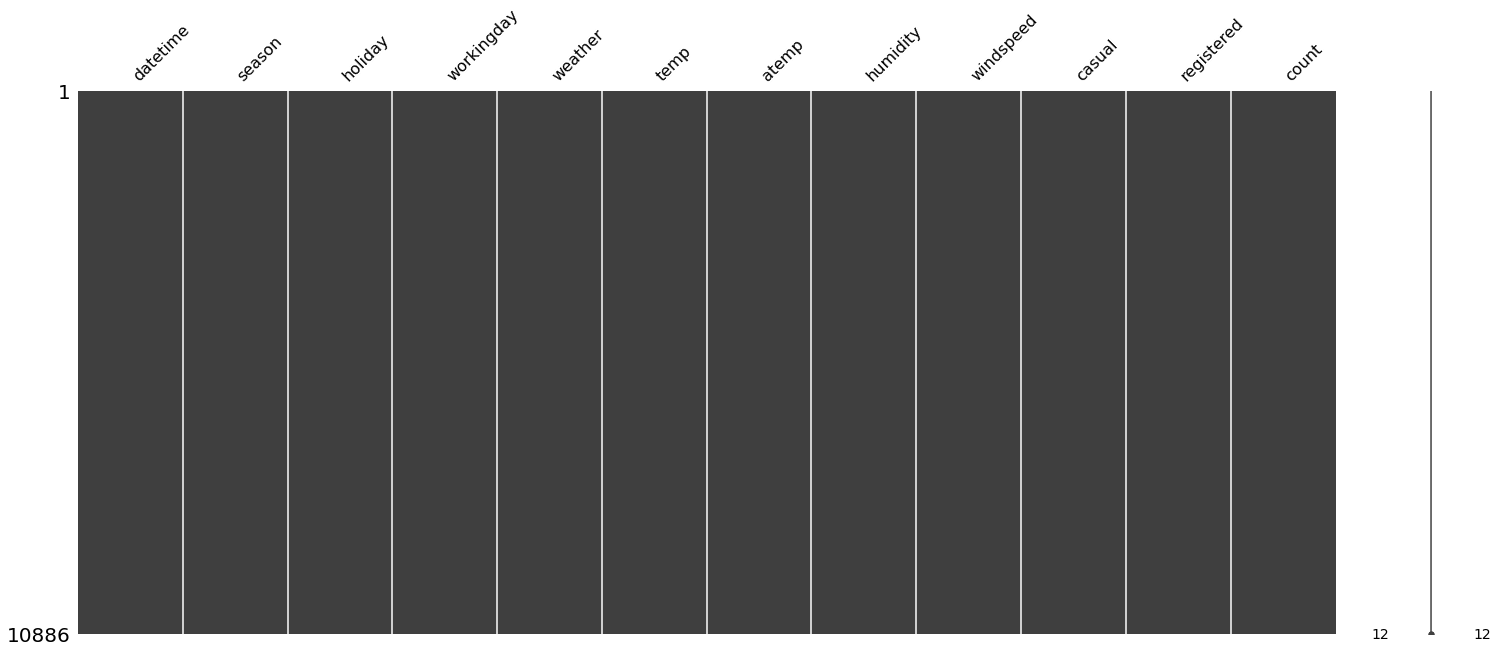

In [13]:
import missingno
missingno.matrix(train_df)

### test_df 확인

* datetime : 연-월-일-시-분-초
* season : 1=spring, 2=summer, 3=fall, 4=winter
* holiday : 0=공휴일이 아닌 날, 1=공휴일인 날
* wokingday : 0=공휴일이거나 주말인 날, 1=(공휴일 and 주말)이 아닌 날
* weather :
    * 1=맑음, 약간 구름
    * 2=구름 낀
    * 3=약간 눈 또는 비
    * 4=강한 비 또는 눈
* temp : 섭씨
* atemp : 체감온도
* humidity : 상대습도
* windspeed : 풍속

In [14]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


<AxesSubplot:>

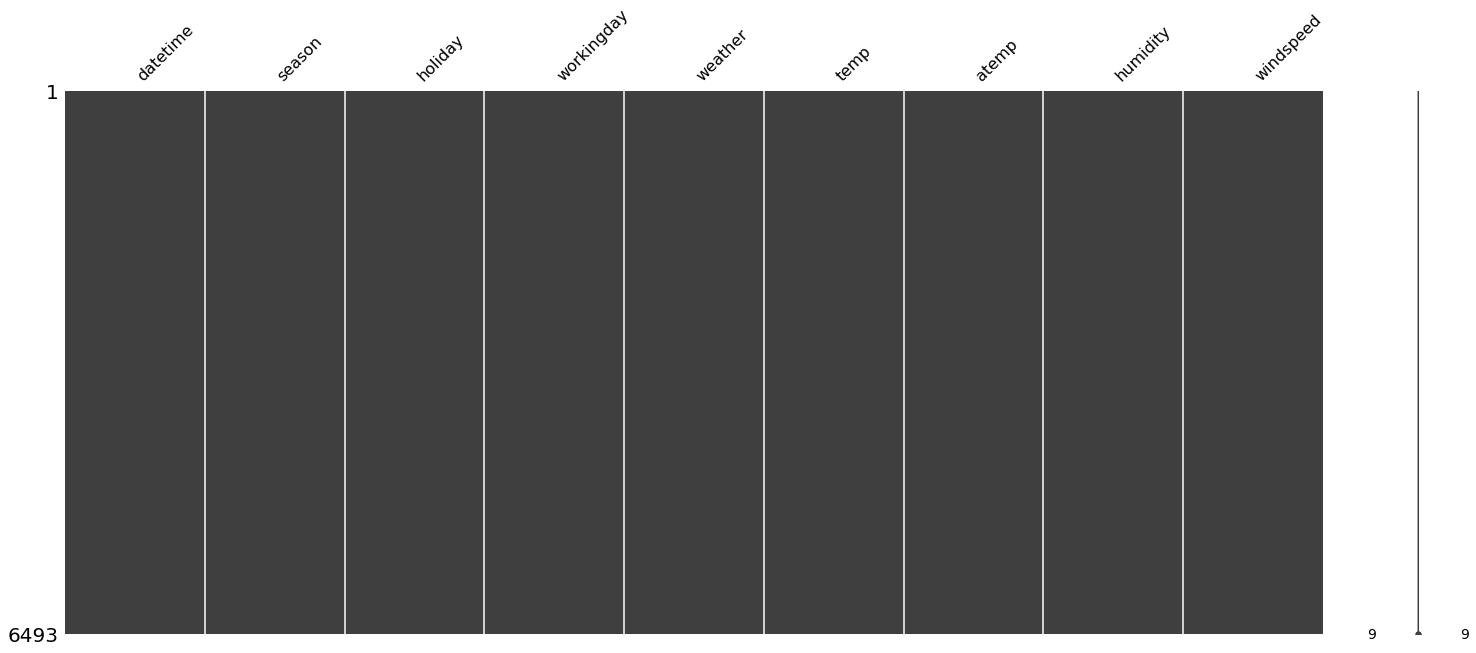

In [15]:
missingno.matrix(test_df)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### Data 변환

#### Data 결합

In [16]:
train_df.shape

(10886, 12)

In [17]:
all_df = pd.concat((train_df, test_df)).reset_index(drop = True)
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [18]:
# 데이터 분리 위치
train_df = all_df[:10886]
test_df = all_df[10886:]
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10886,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN
10887,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
10888,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
10889,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
10890,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN


#### Datetime 분리

In [19]:
dt = pd.DatetimeIndex(all_df['datetime'])
all_df.set_index(dt, inplace=True)
all_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN


In [20]:
all_df['date'] = dt.date
all_df['year'] = dt.year
all_df['month'] = dt.month
all_df['day'] = dt.day
all_df['hour'] = dt.hour
all_df['dow'] = dt.dayofweek
all_df['woy'] = dt.weekofyear
all_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  date        17379 non-null  object 
 13  year        17379 non-null  int64  
 14  month       17379 non-null  int64  
 15  day         17379 non-null  int64  
 16  hour        17379 non-null  int64  
 17  dow         17379 non-null  int64  
 18  woy         17379 non-null  int

/var/folders/mc/dq2kv5b10qjd6sq35tn_rvph0000gn/T/ipykernel_78611/2003039922.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  all_df['woy'] = dt.weekofyear


#### RMSLE 성능 평가를 위한 target 값 column 변환

In [21]:
import numpy as np

all_df['casual_log'] = np.log(all_df['casual'] + 1)
all_df['registered_log'] = np.log(all_df['registered'] + 1)
all_df['count_log'] = np.log(all_df['count'] + 1)

all_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,year,month,day,hour,dow,woy,casual_log,registered_log,count_log
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,...,2011-01-01,2011,1,1,0,5,52,1.386294,2.639057,2.833213
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,...,2011-01-01,2011,1,1,1,5,52,2.197225,3.496508,3.713572
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,...,2011-01-01,2011,1,1,2,5,52,1.791759,3.332205,3.496508
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,...,2011-01-01,2011,1,1,3,5,52,1.386294,2.397895,2.639057
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,...,2011-01-01,2011,1,1,4,5,52,0.000000,0.693147,0.693147


#### Data 저장

In [22]:
train_df = all_df[:10886]
test_df = all_df[10886:]
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,year,month,day,hour,dow,woy,casual_log,registered_log,count_log
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-20 00:00:00,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,...,2011-01-20,2011,1,20,0,3,3,NaN,NaN,NaN
2011-01-20 01:00:00,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,...,2011-01-20,2011,1,20,1,3,3,NaN,NaN,NaN
2011-01-20 02:00:00,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,...,2011-01-20,2011,1,20,2,3,3,NaN,NaN,NaN
2011-01-20 03:00:00,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,...,2011-01-20,2011,1,20,3,3,3,NaN,NaN,NaN
2011-01-20 04:00:00,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,...,2011-01-20,2011,1,20,4,3,3,NaN,NaN,NaN


In [23]:
train_df.to_csv("data/train.csv", mode='w')
test_df.to_csv("data/test.csv", mode='w')

In [1]:
import pandas as pd

train_df = pd.read_csv("data/train.csv")

In [7]:
from sklearn.model_selection import train_test_split
ml_cols = ['season', 'holiday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dow', 'woy']
X_train, X_test, y_train, y_test = train_test_split(train_df[ml_cols], train_df['count_log'], test_size=0.2,
                                                    shuffle=True, random_state=0)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("R2 Score : {0:.4f}".format(r2_score(y_test, preds)))

R2 Score : 0.4929
